In [ ]:
from production import Worldline, local_move, Problem, ExactSolver
import numpy as np
from tqdm.notebook import tqdm

In [2]:
rng = np.random.default_rng(7)

In [41]:
pb = Problem(
    n_sites=8,
    J_x=60.0,
    J_z=1.0,
    temperature=5,
    m=10
)
np.tanh(pb.delta_tau * pb.J_x / 2), pb.delta_tau


(np.float64(0.5370495669980352), 0.02)

In [42]:
solver = ExactSolver(pb)
solver.energy

np.complex128(-155.80313682673707+0j)

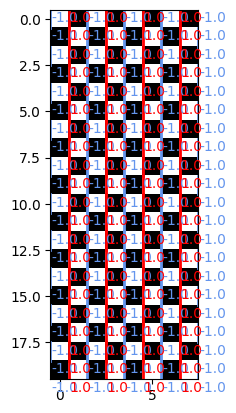

In [43]:
spins = np.ones((2*pb.m, pb.n_sites))
for i in range(0, pb.n_sites, 2):
    spins[:, i] *= -1

wl = Worldline(pb, spins)
wl.draw()

In [44]:
for _ in tqdm(range(10_000)):
    local_move(wl, rng)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [47]:
n_cycles = 3_000
length_cycle = 2 * pb.m * pb.n_sites
energies = np.zeros(n_cycles)
weights = np.zeros(n_cycles)

for i in tqdm(range(n_cycles)):
    for _ in range(length_cycle):
        local_move(wl, rng, switch_propa=0.2)
    energies[i] = wl.energy
    weights[i] = wl.weight

  0%|          | 0/3000 [00:00<?, ?it/s]

In [48]:
energy = np.mean(energies)
print(energy)

-106.14991599340411
